In [1]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

## Data Collection

In [12]:
data = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\weatherAUS.csv')

## Data Visualization And Analysis

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
data = data.drop(['Location'], axis=1)

In [6]:
data1 = data['Location'].replace('Albury', 'Choba')

KeyError: 'Location'

In [ ]:
data2 = data.concat([data,data1])

In [17]:
data = pd.concat([data,data1], axis=1)

In [18]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Location
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,Choba
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,Choba
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,Choba
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,Choba
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,Choba


In [86]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### Checking For Null Values In Boolean Format

In [87]:
data.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
142189,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
142190,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
142191,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False


### Summaring Of Null Values In Each Column

In [7]:
data.isnull().sum()

Date                 0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

### Heat Map Of Null Values

<AxesSubplot:>

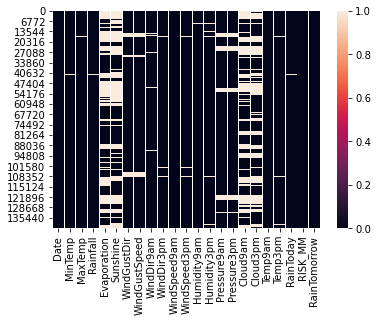

In [8]:
sns.heatmap(data.isnull(), yticklabels='auto')

### Bar Chart Of Tomorrow RainFail From Data

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

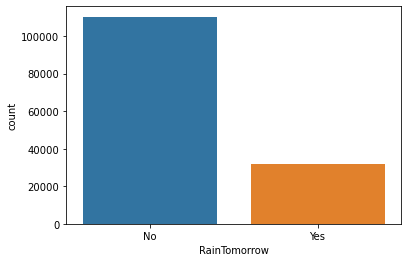

In [9]:
sns.countplot(x='RainTomorrow', data=data)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

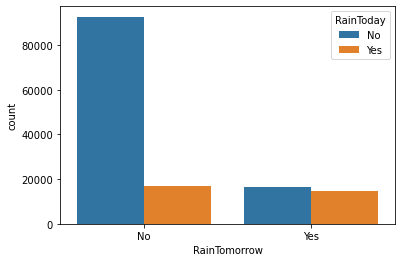

In [10]:
sns.countplot(x='RainTomorrow', hue='RainToday', data=data)

## Data Wrangling

### Irrelevant Columns Removed

In [13]:
sylvas = data.drop(['Date','Location','Evaporation','Sunshine','WindGustDir','WindDir9am','WindDir3pm','WindGustSpeed','Cloud9am','Cloud3pm'], axis=1)
sylvas.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [14]:
RainToday = pd.get_dummies(sylvas['RainToday'],drop_first=True)
RainToday = RainToday.rename(columns={'Yes': 'RToday'})
RainToday.head()

,RToday
0,0
1,0
2,0
3,0
4,0


In [15]:
sylvas = pd.concat([sylvas,RainToday], axis=1)
# sylvas =  sylvas.drop(RainToday, axis=1)
sylvas.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,RToday
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No,0
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No,0
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No,0
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No,0
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No,0


### Saving Data to csv File

In [218]:
# sylvas.to_csv('D:\\desktop files\\weka\Datasets\\Prof Ugwu\\sylvas_weather_mod.csv')

In [16]:
sylvas =  sylvas.drop(['RainToday'], axis=1)
sylvas.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,RToday
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No,0
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No,0
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No,0
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No,0
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No,0


This tells us that if the margin Today between rainfall is greater that tghan sunshine rain will fall tomorrow 

In [17]:
df = data.drop(['Date','Location','Evaporation','Sunshine','WindGustDir','WindDir9am','WindDir3pm','WindGustSpeed','Cloud9am','Cloud3pm'], axis=1)

In [18]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


<AxesSubplot:>

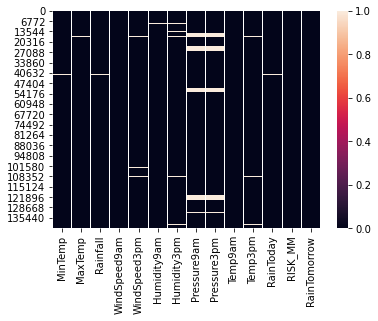

In [19]:
sns.heatmap(df.isnull(), yticklabels='auto')

In [20]:
# ddf= df.dropna(axis=0)

df = df.replace(0, np.nan)
df = df.dropna(how='any', axis=0)
ddf = df.replace(np.nan, 0)

# df.loc[(df!=0).any(1)]

# df.loc[~(df==0).all(axis=1)]

# temp = df.abs().sum(axis=1) == 0      
# df = df.drop(temp)


# # Is there anything in this row non-zero?
# # df != 0 --> which entries are non-zero? T/F
# # (df != 0).any(axis=1) --> are there 'any' entries non-zero row-wise? T/F of rows that return true to this statement.
# # df.loc[all_zero_mask,:] --> mask your rows to only show the rows which contained a non-zero entry.
# # df.shape to confirm a subset.

# all_zero_mask=(df != 0).any(axis=1) # Is there anything in this row non-zero?
# df.loc[all_zero_mask,:].shape

In [21]:
df

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No
11,15.9,21.7,2.2,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,15.6,Yes
12,15.9,18.6,15.6,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,Yes,3.6,Yes
16,13.5,22.9,16.8,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,Yes,10.6,Yes
28,12.5,24.2,1.2,11.0,22.0,78.0,70.0,1005.6,1003.4,12.5,18.2,Yes,0.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142059,24.8,39.8,0.4,15.0,20.0,38.0,24.0,1007.0,1003.6,31.5,36.6,No,6.2,Yes
142060,22.2,39.4,6.2,19.0,9.0,56.0,25.0,1008.4,1004.9,28.6,38.7,Yes,0.2,No
142125,15.2,21.5,6.8,19.0,9.0,65.0,65.0,1016.9,1015.3,19.0,21.2,Yes,12.6,Yes
142126,17.7,26.9,12.6,15.0,20.0,93.0,59.0,1018.1,1014.7,19.0,26.0,Yes,34.6,Yes


In [312]:
# ddf.to_csv('sylvas_weather_nna.csv')

In [22]:
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RISK_MM         0
RainTomorrow    0
dtype: int64

In [23]:
df.drop(df.index[[120000,130000]])

IndexError: index 120000 is out of bounds for axis 0 with size 25156

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25156 entries, 4 to 142127
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       25156 non-null  float64
 1   MaxTemp       25156 non-null  float64
 2   Rainfall      25156 non-null  float64
 3   WindSpeed9am  25156 non-null  float64
 4   WindSpeed3pm  25156 non-null  float64
 5   Humidity9am   25156 non-null  float64
 6   Humidity3pm   25156 non-null  float64
 7   Pressure9am   25156 non-null  float64
 8   Pressure3pm   25156 non-null  float64
 9   Temp9am       25156 non-null  float64
 10  Temp3pm       25156 non-null  float64
 11  RainToday     25156 non-null  object 
 12  RISK_MM       25156 non-null  float64
 13  RainTomorrow  25156 non-null  object 
dtypes: float64(12), object(2)
memory usage: 2.9+ MB


<AxesSubplot:>

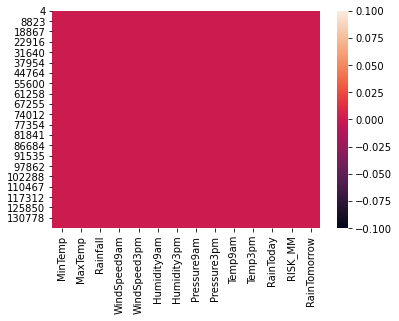

In [25]:
sns.heatmap(df.isnull(), yticklabels='auto')

### Removal Of Null Values In Data

In [26]:
df.dropna(inplace=True)

### Null Values In Data Replaced With Zero(s)

<AxesSubplot:>

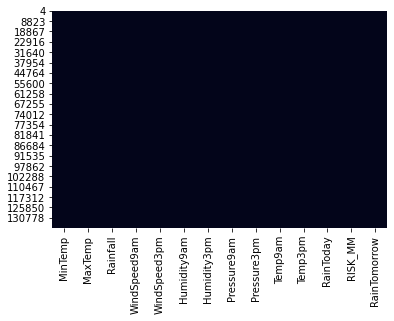

In [27]:
sns.heatmap(df.isnull(), yticklabels='auto', cbar=False)

### New Summaring Of Null Values In Data

In [28]:
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RISK_MM         0
RainTomorrow    0
dtype: int64

In [29]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No
11,15.9,21.7,2.2,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,15.6,Yes
12,15.9,18.6,15.6,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,Yes,3.6,Yes
16,13.5,22.9,16.8,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,Yes,10.6,Yes
28,12.5,24.2,1.2,11.0,22.0,78.0,70.0,1005.6,1003.4,12.5,18.2,Yes,0.8,No


In [30]:
RainToday = pd.get_dummies(df['RainToday'],drop_first=True)
RainToday = RainToday.rename(columns={'Yes': 'RainToday'})
RainToday.head()

,RainToday
4,0
11,1
12,1
16,1
28,1


In [31]:
RainTomorrow = pd.get_dummies(df['RainTomorrow'],drop_first=True)
RainTomorrow = RainTomorrow.rename(columns={'Yes': 'RainTomorrow'})
RainTomorrow.head()

,RainTomorrow
4,0
11,1
12,1
16,1
28,0


In [38]:
ddf = df.drop(['RainToday','RainTomorrow'], axis=1)

In [39]:
df = pd.concat([ddf,RainToday,RainTomorrow], axis=1)

In [40]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainToday,RainTomorrow
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0,0
11,15.9,21.7,2.2,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,15.6,1,1
12,15.9,18.6,15.6,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,3.6,1,1
16,13.5,22.9,16.8,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,10.6,1,1
28,12.5,24.2,1.2,11.0,22.0,78.0,70.0,1005.6,1003.4,12.5,18.2,0.8,1,0


In [140]:
# df = df.drop(df.iloc[:,20:22], axis=1)

In [41]:
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RISK_MM         0
RainToday       0
RainTomorrow    0
dtype: int64

### Saving New Cleaned Data To csv File

In [170]:
# df.to_csv('sylvas_weather.csv')

In [181]:
df['RainTomorrow_Yes'].describe()

count    123968.000000
mean          0.221001
std           0.414923
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainTomorrow_Yes, dtype: float64

In [165]:
# X = df.drop('RainTomorrow_Yes', axis=1)
Y = df['RainTomorrow_Yes']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25156 entries, 4 to 142127
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       25156 non-null  float64
 1   MaxTemp       25156 non-null  float64
 2   Rainfall      25156 non-null  float64
 3   WindSpeed9am  25156 non-null  float64
 4   WindSpeed3pm  25156 non-null  float64
 5   Humidity9am   25156 non-null  float64
 6   Humidity3pm   25156 non-null  float64
 7   Pressure9am   25156 non-null  float64
 8   Pressure3pm   25156 non-null  float64
 9   Temp9am       25156 non-null  float64
 10  Temp3pm       25156 non-null  float64
 11  RISK_MM       25156 non-null  float64
 12  RainToday     25156 non-null  uint8  
 13  RainTomorrow  25156 non-null  uint8  
dtypes: float64(12), uint8(2)
memory usage: 2.5 MB


In [43]:
X = df.iloc[0:6999,0:12]
Y = df.iloc[0:6999,13]

In [44]:
x= X.to_numpy()
y= Y.to_numpy()

In [48]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [46]:
# X.shape
Y.shape

(6999,)

In [49]:
from sklearn.preprocessing import StandardScaler as sc
from sklearn.preprocessing import scale

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [51]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [52]:
xx_train = scale(X_train)
xx_test = scale(X_test)
# y_train = scale(y_train)
# y_test = scale(y_test)

In [53]:
# X_traintest = sc.transform(xx_train,xx_test)

TypeError: [[ 1.53686834  0.77152314 -0.57371455 ...  1.5947223  -0.04665871
  -0.38699601]
 [-1.27395125 -0.89179909 -0.42185345 ... -1.76543484 -0.79892349
   0.17402802]
 [-0.94711176 -0.95417368 -0.58539617 ... -0.91419503 -0.75593693
   0.75998645]
 ...
 [-0.72921877 -1.66108562  0.68790068 ... -1.27261179 -1.80910762
   2.38072253]
 [-2.18910181 -1.66108562 -0.51530643 ... -2.14625265 -1.50820171
  -0.41193041]
 [-1.05605825 -0.35121937 -0.49194319 ... -0.86939293 -0.71295037
  -0.41193041]] is not an estimator instance.

In [265]:
# from sklearn.linear_model import LogisticRegression

In [293]:
# logmodel = LogisticRegression()

In [294]:
# logmodel.fit(X_train, y_train)

LogisticRegression()

In [295]:
# from sklearn.metrics import classification_report

In [296]:
# prediction = logmodel.predict(X_test)

In [273]:
# classification_report(y_train, prediction)

ValueError: Found input variables with inconsistent numbers of samples: [4899, 2100]

In [20]:
# weather = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\sylvas_weather_mod.csv')

In [21]:
# weather.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RToday,RainTomorrow
0,13.4,22.9,0.6,20,24,71,22,1007.7,1007.1,16.9,21.8,0.0,0,No
1,7.4,25.1,0.0,4,22,44,25,1010.6,1007.8,17.2,24.3,0.0,0,No
2,12.9,25.7,0.0,19,26,38,30,1007.6,1008.7,21.0,23.2,0.0,0,No
3,9.2,28.0,0.0,11,9,45,16,1017.6,1012.8,18.1,26.5,1.0,0,No
4,17.5,32.3,1.0,7,20,82,33,1010.8,1006.0,17.8,29.7,0.2,0,No


In [22]:
rain = weather.iloc[:,12:14]

In [32]:
rain.head(10)

,RToday,RainTomorrow
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No
5,0,No
6,0,No
7,0,No
8,0,Yes
9,1,No


In [24]:
new_weather = weather.drop(['RToday','RainTomorrow'], axis=1)

In [25]:
new_weather.head(2)

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,20,24,71,22,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.1,0.0,4,22,44,25,1010.6,1007.8,17.2,24.3,0.0


In [26]:
new_weather = new_weather.replace(0, np.nan)
new_weather = new_weather.dropna(how='any', axis=0)
ddf = new_weather.replace(np.nan, 0)

In [27]:
ddf

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2
11,15.9,21.7,2.2,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,15.6
12,15.9,18.6,15.6,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,3.6
16,13.5,22.9,16.8,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,10.6
28,12.5,24.2,1.2,11.0,22.0,78.0,70.0,1005.6,1003.4,12.5,18.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
142059,24.8,39.8,0.4,15.0,20.0,38.0,24.0,1007.0,1003.6,31.5,36.6,6.2
142060,22.2,39.4,6.2,19.0,9.0,56.0,25.0,1008.4,1004.9,28.6,38.7,0.2
142125,15.2,21.5,6.8,19.0,9.0,65.0,65.0,1016.9,1015.3,19.0,21.2,12.6
142126,17.7,26.9,12.6,15.0,20.0,93.0,59.0,1018.1,1014.7,19.0,26.0,34.6


In [28]:
ddf = pd.concat([ddf,rain], axis=1)

In [29]:
ddd = ddf.dropna(how='any', axis=0)

In [30]:
ddd

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RToday,RainTomorrow
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0,No
11,15.9,21.7,2.2,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,15.6,1,Yes
12,15.9,18.6,15.6,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,3.6,1,Yes
16,13.5,22.9,16.8,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,10.6,1,Yes
28,12.5,24.2,1.2,11.0,22.0,78.0,70.0,1005.6,1003.4,12.5,18.2,0.8,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142059,24.8,39.8,0.4,15.0,20.0,38.0,24.0,1007.0,1003.6,31.5,36.6,6.2,0,Yes
142060,22.2,39.4,6.2,19.0,9.0,56.0,25.0,1008.4,1004.9,28.6,38.7,0.2,1,No
142125,15.2,21.5,6.8,19.0,9.0,65.0,65.0,1016.9,1015.3,19.0,21.2,12.6,1,Yes
142126,17.7,26.9,12.6,15.0,20.0,93.0,59.0,1018.1,1014.7,19.0,26.0,34.6,1,Yes


In [347]:
# ddd.to_csv('sylvas_weather_nna.csv')

In [31]:
RainTomorrow = pd.get_dummies(rain['RainTomorrow'],drop_first=True)
RainTomorrow = RainTomorrow.rename(columns={'Yes': 'RainTomorrow'})
RainTomorrow.head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [33]:
ddf = pd.concat([ddf,RainTomorrow], axis=1)
ddf.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RToday,RainTomorrow,RainTomorrow
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No,0
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0,No,0


In [37]:
dddd = ddf.dropna(how='any', axis=0)

In [38]:
dddd

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RToday,RainTomorrow,RainTomorrow
4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,0,No,0
11,15.9,21.7,2.2,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,15.6,1,Yes,1
12,15.9,18.6,15.6,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,3.6,1,Yes,1
16,13.5,22.9,16.8,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,10.6,1,Yes,1
28,12.5,24.2,1.2,11.0,22.0,78.0,70.0,1005.6,1003.4,12.5,18.2,0.8,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142059,24.8,39.8,0.4,15.0,20.0,38.0,24.0,1007.0,1003.6,31.5,36.6,6.2,0,Yes,1
142060,22.2,39.4,6.2,19.0,9.0,56.0,25.0,1008.4,1004.9,28.6,38.7,0.2,1,No,0
142125,15.2,21.5,6.8,19.0,9.0,65.0,65.0,1016.9,1015.3,19.0,21.2,12.6,1,Yes,1
142126,17.7,26.9,12.6,15.0,20.0,93.0,59.0,1018.1,1014.7,19.0,26.0,34.6,1,Yes,1


In [39]:
dddd.to_csv('D:\\desktop files\\weka\\Datasets\\Prof Ugwu\\sylvas_weather_regre.csv')